In [1]:
from PIL import Image
from sklearn.preprocessing import binarize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from selenium import webdriver
from io import BytesIO
from bs4 import BeautifulSoup as bs
from IPython.display import clear_output
import matplotlib.pyplot as plt
import cv2,time,requests,time, scipy
import numpy as np 
import pyscreenshot as ImageGrab
import os,imageio

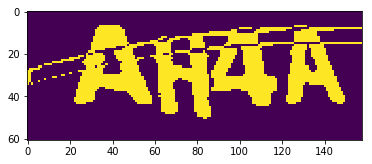

In [103]:
path = 'G:/WebScraping/Project_HSPR/trainingdata/unfinished_label/'
img = cv2.imread(path + str(11) + '.png')
dst = cv2.fastNlMeansDenoisingColored(img,None,25,25,7,21)

# plt.imshow(img)
# plt.show()
# plt.imshow(dst)
# plt.show()
ret, thresh = cv2.threshold(dst,127,255,cv2.THRESH_BINARY_INV)
# plt.imshow(thresh)
# plt.show()
imgarr = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
# plt.imshow(imgarr)
# plt.show()
rang = imgarr.shape
imgarr[:,5:rang[1]-5] = 0 #no need for too much
imagedata = np.where(imgarr == 255)
X = np.array([imagedata[1]])
Y = rang[0] - imagedata[0]
poly_reg = PolynomialFeatures(degree = 2)
X_ = poly_reg.fit_transform(X.T)
regr = LinearRegression()
regr.fit(X_, Y)
X2 = np.array([[i for i in range(0,rang[1])]])
X2_ = poly_reg.fit_transform(X2.T)

# plt.scatter(X,Y,color='black')
# plt.ylim(ymin=0)
# plt.ylim(ymax=rang[0])
# plt.plot(X2.T, regr.predict(X2_), color='blue', linewidth=20)
# print('Coefficient:{}'.format(regr.coef_))
# print('Intercept:{}'.format(regr.coef_))


newimg = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

# plt.imshow(newimg)
# plt.show()

for ele in np.column_stack([regr.predict(X2_).round(0),X2[0],]):
    pos = rang[0]-int(ele[0])
#     newimg[pos-4:pos+3,int(ele[1])] = 0
    newimg[pos-3:pos+3,int(ele[1])] = 255 - newimg[pos-3:pos+3,int(ele[1])]

# print(type(newimg))
# converted_img = cv2.cvtColor(newimg, cv2.COLOR_GRAY2BGR)
# newimg2 = cv2.fastNlMeansDenoisingColored(converted_img,None,25,25,9,20)
# newimg3 = cv2.cvtColor(newimg2, cv2.COLOR_BGR2GRAY)

plt.imshow(newimg)
plt.show()
# plt.imshow(newimg3)
# plt.show()
# return thresh, newimg